## Assignment 1: Machine Learning Methods

### Kshitij Desai - a1936769

#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad). 
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import warnings

In [2]:
# Configuration
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

### 1. Read the dataset

In [3]:
df = pd.read_csv('ObesityDataSet.csv')

### 2. Analyse and visualise the data

In [103]:
# let's get some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### ☝️ We can see we have 17 columns and 2111 rows

In [104]:
# let's see first 5 rows of the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [ ]:
# let's check for missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


###  ☝️ We can see that there are no missing values in the dataset

In [105]:
# let's get some statistics about the dataset
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


###  ☝️ We can see that there are no missing values in the dataset

In [8]:
# lets calculate bmi
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

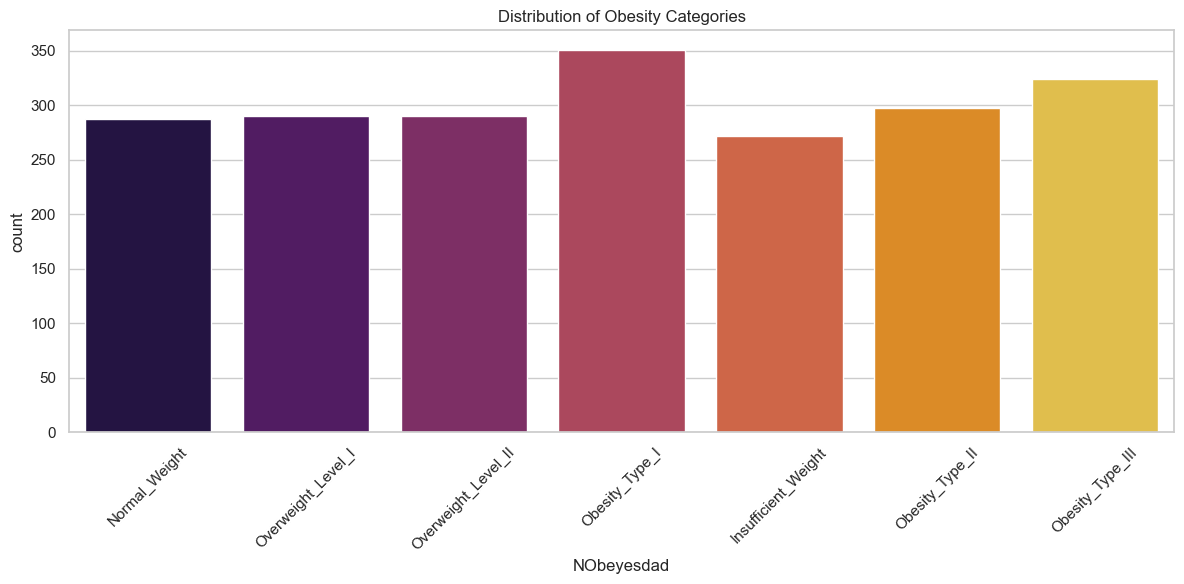

In [9]:
# Distribution of obesity categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='NObeyesdad', palette='inferno')
plt.title('Distribution of Obesity Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ☝️ Fairly uniform (balanced) distribution, diverse enough to learn representations of each class.

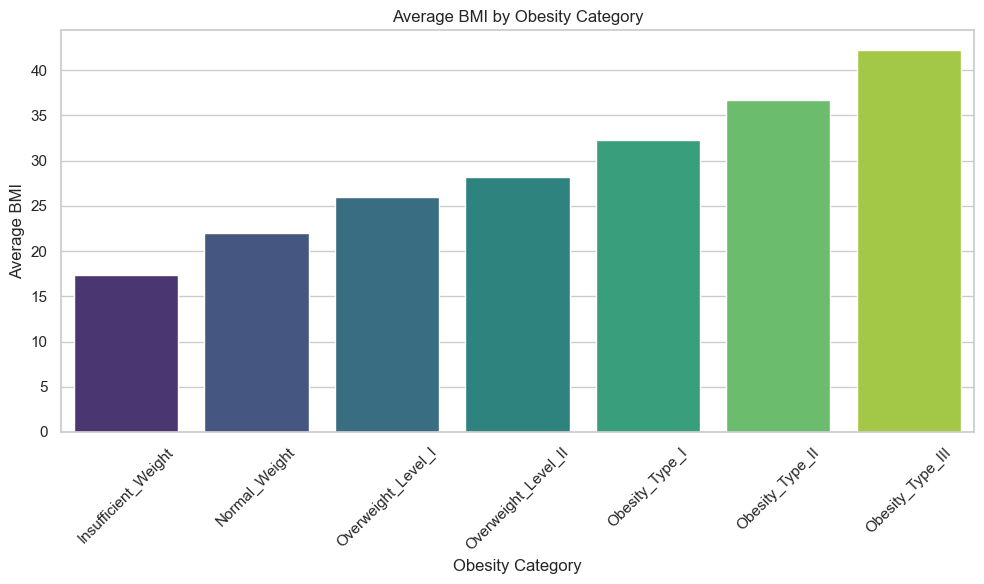

In [73]:
# Average BMI vs Obesity Category sorted by BMI
avg_bmi_by_category = df.groupby('NObeyesdad')['BMI'].mean().sort_values()

# Reset index to convert Series to DataFrame
avg_bmi_df = avg_bmi_by_category.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='NObeyesdad', y='BMI', data=avg_bmi_df, palette='viridis')
plt.title('Average BMI by Obesity Category')
plt.xlabel('Obesity Category')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ☝️ We can see there is a good separation based on bmi

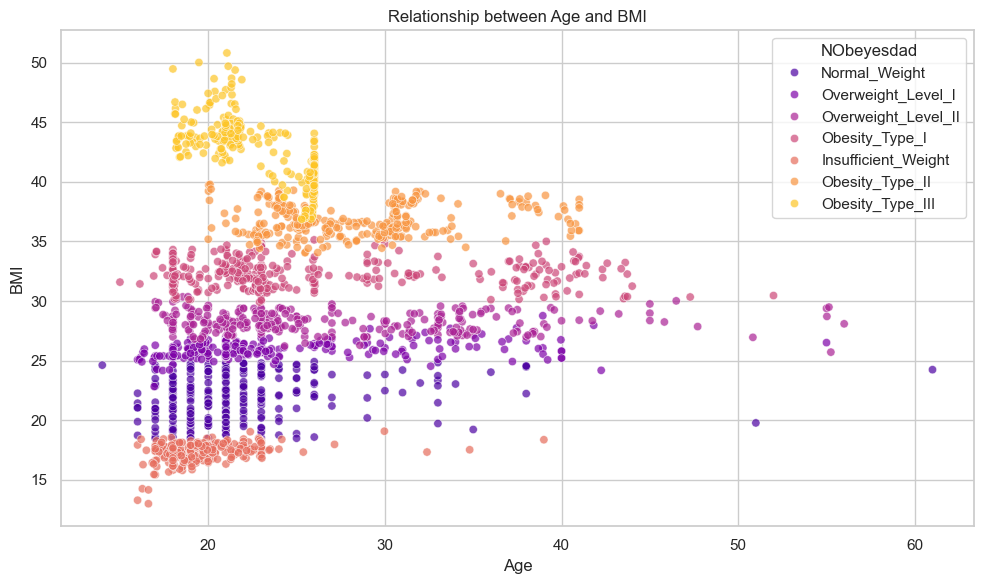

In [16]:
# Relationship between age and BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='NObeyesdad', palette='plasma', alpha=0.7)
plt.title('Relationship between Age and BMI')
plt.tight_layout()
plt.show()

### ☝️  Observations
* We can see majority of the participant are between 18 and 40 years with younger people seem to have high variance but at older ages they all seem to converge to a bmi of around 27
* We cannot see a strong correlation between age and bmi

In [17]:
# Let's analyze categorical eating habits variables

# FACV: Frequent consumption of high-calorie food
# FCVC: Frequency of consumption of vegetables
# NCP: Number of main meals per day
# CAEC: Consumption of food between meals
# CH2O: Consumption of water
# CALC: Consumption of alcohol

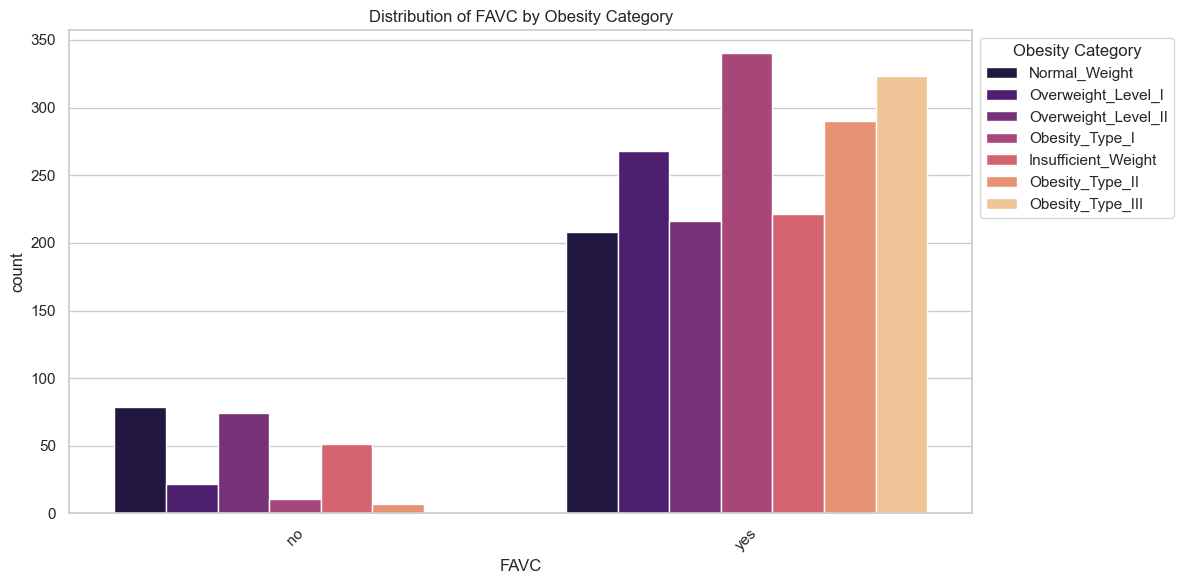

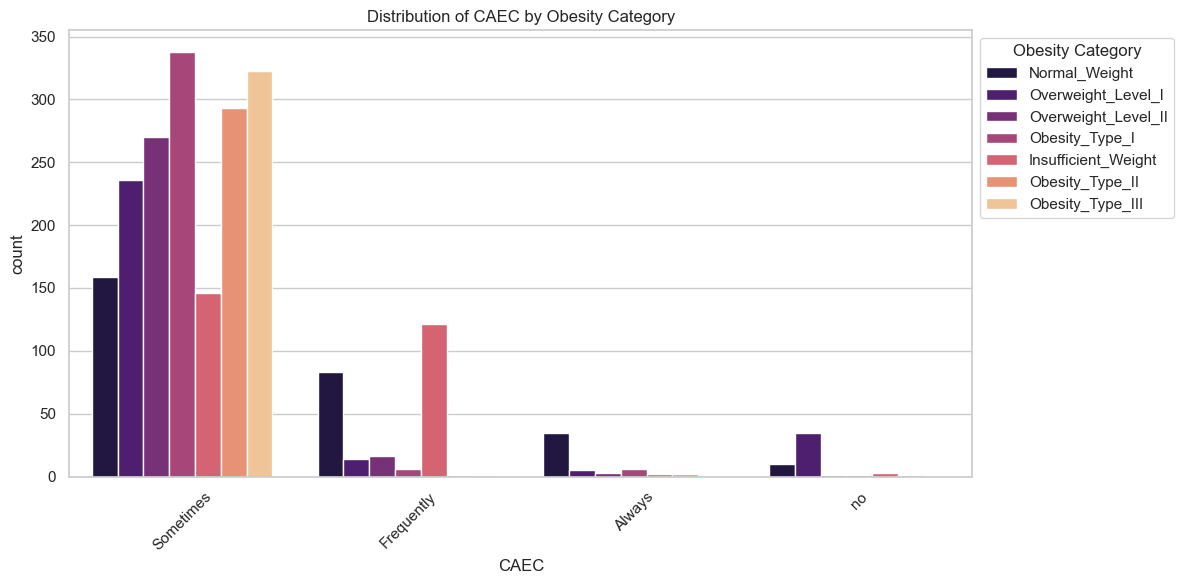

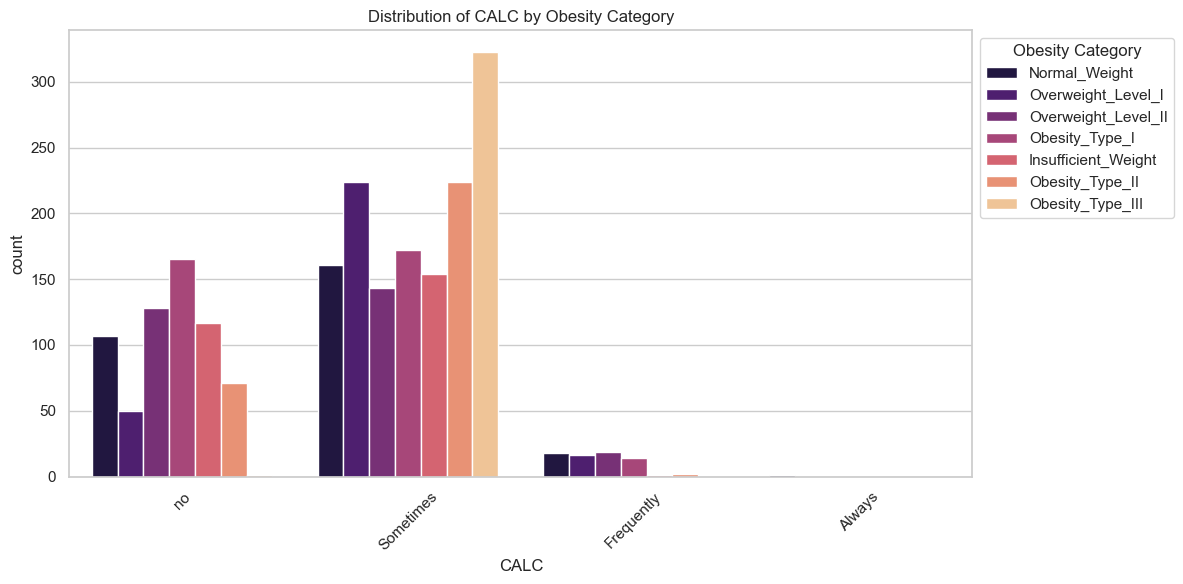

In [18]:
# Define the eating habits variables
eating_habits = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'CALC']


# Visualize categorical eating habits
for habit in ['FAVC', 'CAEC', 'CALC']:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=habit, hue='NObeyesdad', palette='magma')
    plt.title(f'Distribution of {habit} by Obesity Category')
    plt.xticks(rotation=45)
    plt.legend(title='Obesity Category', bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### ☝️ Observation:
1. We can see that frequent consumption of high-calorie food (FAVC) is associated with a higher prevalence of obesity.
2. Most people responded that they sometimes consume food between meals, interestingly some insufficient weight people seem to have frequent meals due to which they might be eating lower quanity of food
3. People who are highly obese seem to drink alcohol sometimes

In [19]:
# Lets analyze numerical eating habits variables

# FCVC: Frequency of consumption of vegetables
# NCP: Number of main meals per day
# CH2O: Consumption of water

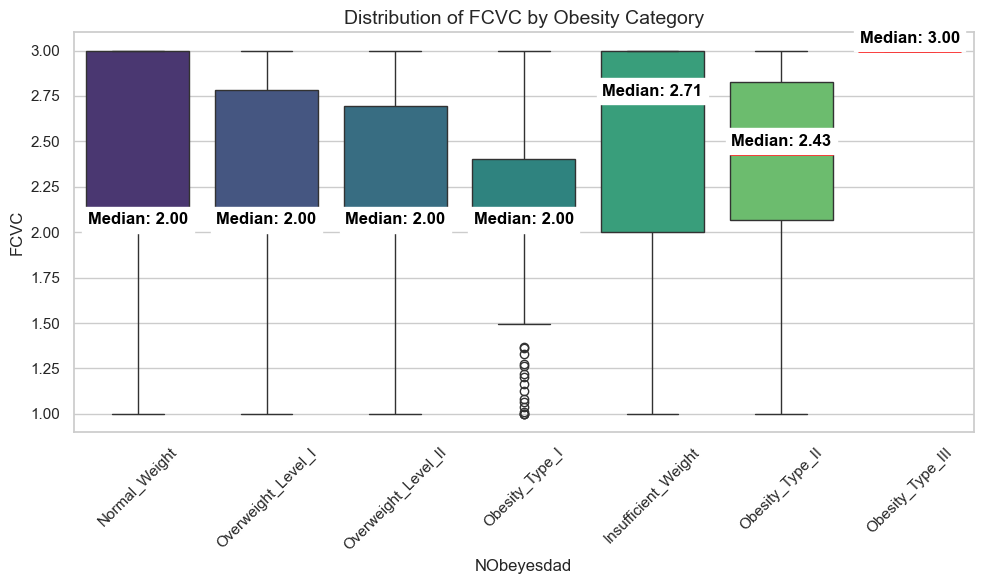

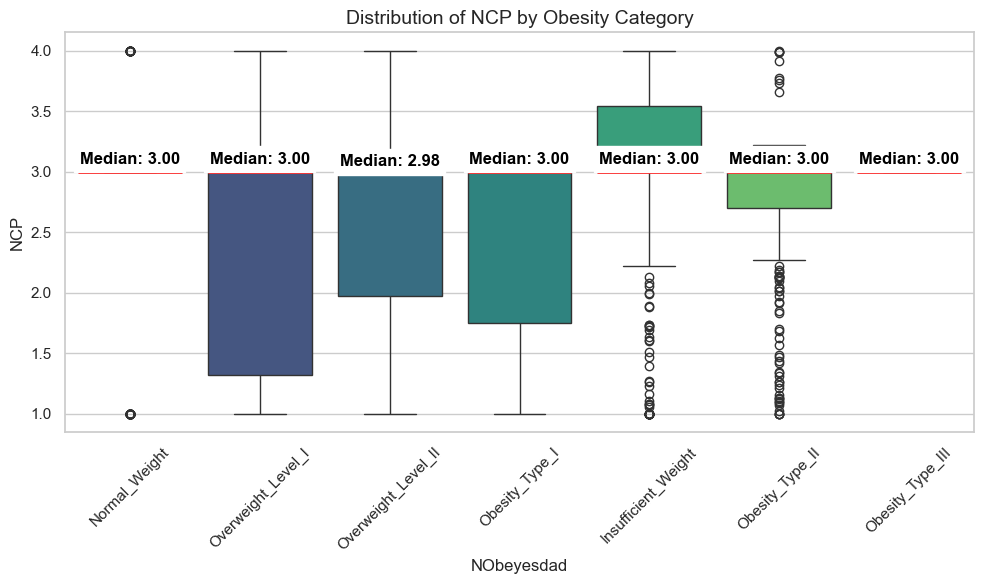

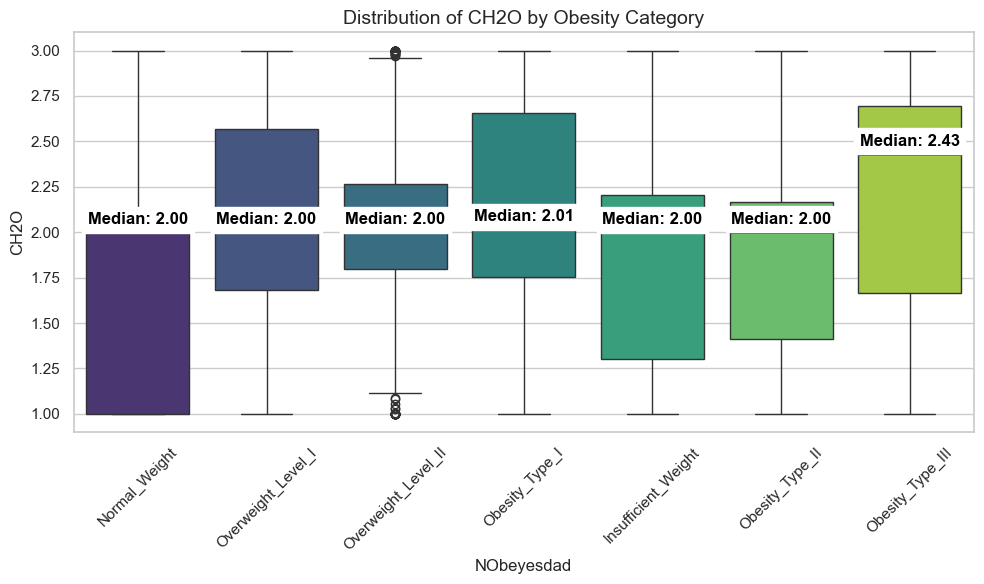

In [20]:
# Visualize numerical eating habits with enhanced medians
for habit in ['FCVC', 'NCP', 'CH2O']:
    plt.figure(figsize=(10, 6))
    
    # Create boxplot with more distinct median lines
    ax = sns.boxplot(data=df, x='NObeyesdad', y=habit, palette='viridis',
                    medianprops={'color': 'red', 'linewidth': 2})
    
    # Add a title and adjust xtick labels
    plt.title(f'Distribution of {habit} by Obesity Category', fontsize=14)
    plt.xticks(rotation=45)
    
    # Get the categories and their median values
    categories = df['NObeyesdad'].unique()
    median_dict = df.groupby('NObeyesdad')[habit].median()
    
    # Add text labels for median values
    for i, cat in enumerate(categories):
        median_val = median_dict[cat]
        # Calculate proper offset based on plot scale
        y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
        offset = y_range * 0.02  # 2% of the y-axis range
        
        # Position text at the actual median value
        ax.text(i, median_val + offset, f'Median: {median_val:.2f}', 
                horizontalalignment='center', size='medium', 
                color='black', weight='bold', backgroundcolor='white')
    
    plt.tight_layout()
    plt.show()

### ☝️ Observations
1. People with insufficient weight are happening to eat more meals and people with more weight tend to eat less, probably they are trying to get their weight under control
2. No significant correlation between eating vegetablse and weight type

In [21]:
# Let's analyze physical activity variables
# SCC: Time spent on sports
# FAF: Frequency of physical activity
# TUE: Time spent on exercise
# MTRANS: Transportation mode

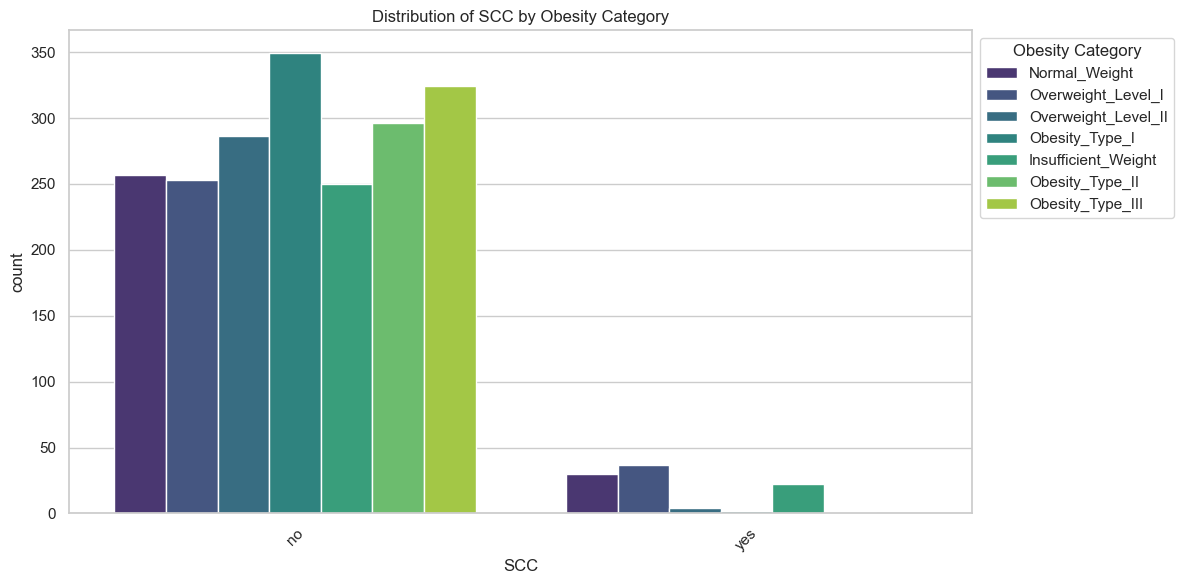

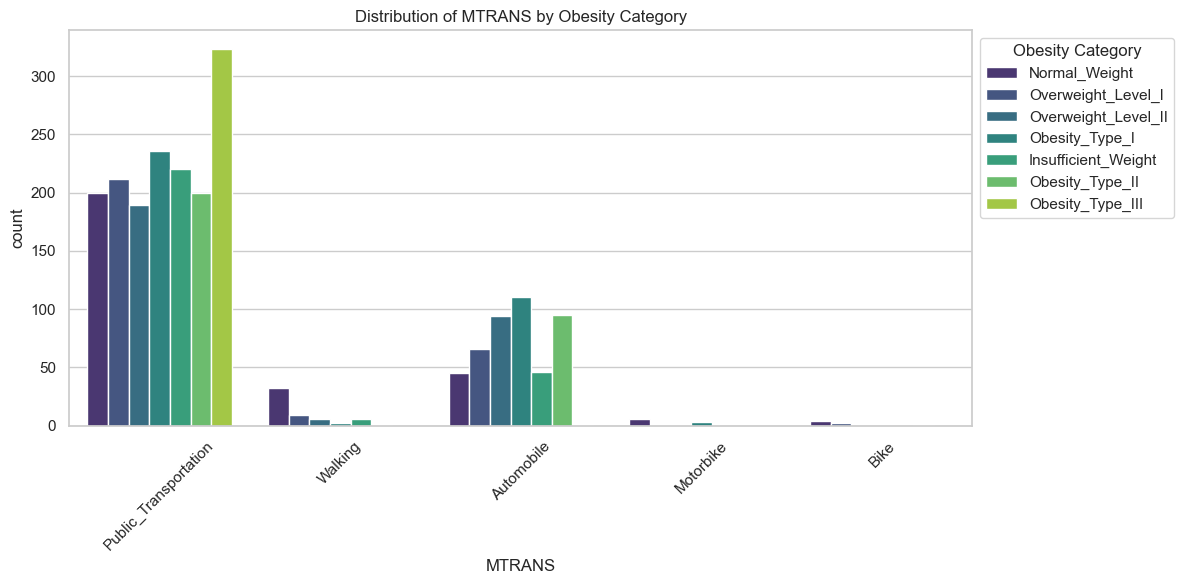

In [24]:
# Visualize categorical physical activity
for activity in ['SCC', 'MTRANS']:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=activity, hue='NObeyesdad', palette='viridis')
    plt.title(f'Distribution of {activity} by Obesity Category')
    plt.xticks(rotation=45)
    plt.legend(title='Obesity Category', bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### ☝️ Observations
1. Most participants dont seem to be involved in sports
2. People with highest obesity seem to use public transportation
3. Of all the people walking there is a higher proportion of people with normal weight 

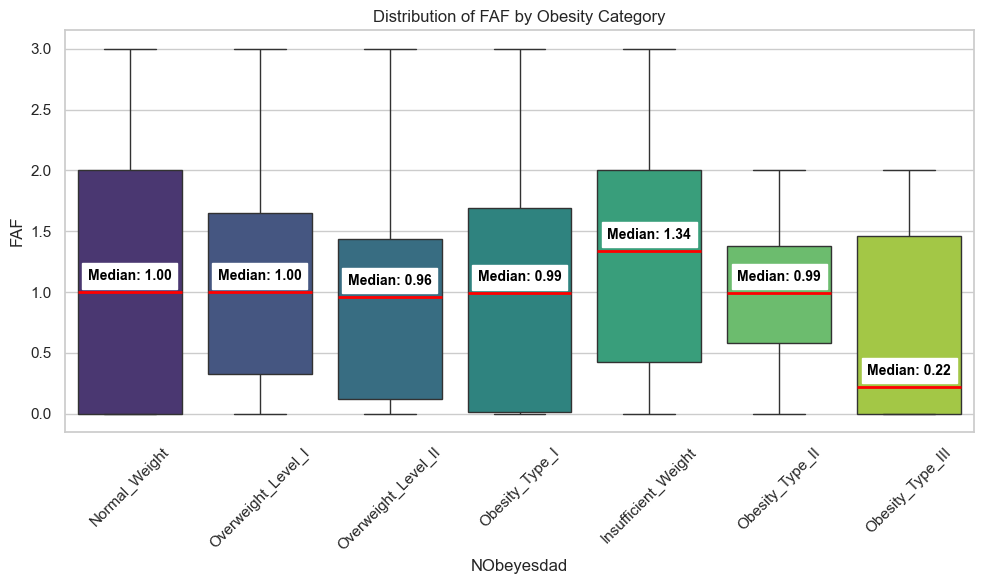

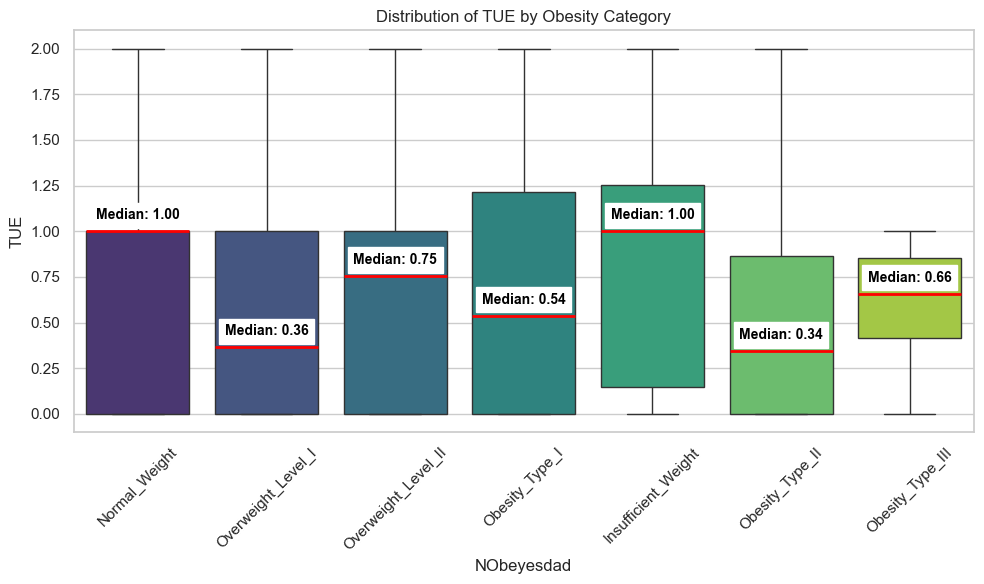

In [25]:
# Visualize numerical physical activity
for activity in ['FAF', 'TUE']:
    plt.figure(figsize=(10, 6))
    
    # Create boxplot with more visible median lines
    ax = sns.boxplot(data=df, x='NObeyesdad', y=activity, palette='viridis',
                   medianprops={'color': 'red', 'linewidth': 2})
    
    # Get the median values for each category
    categories = df['NObeyesdad'].unique()
    medians = df.groupby('NObeyesdad')[activity].median()
    
    # Add text labels for median values
    for i, cat in enumerate(categories):
        median_val = medians[cat]
        # Create a small offset from the median line based on the plot scale
        y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
        offset = y_range * 0.03  # 3% of the y-axis range
        
        # Position the text correctly based on the actual median value
        ax.text(i, median_val + offset, f'Median: {median_val:.2f}', 
                horizontalalignment='center', size='10', 
                color='black', weight='bold', backgroundcolor='white')
    
    plt.title(f'Distribution of {activity} by Obesity Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### ☝️ Observations
1. people who spend more time on exercise are less likely to be obese and highest obese people seem to have lower frequency of physical activities

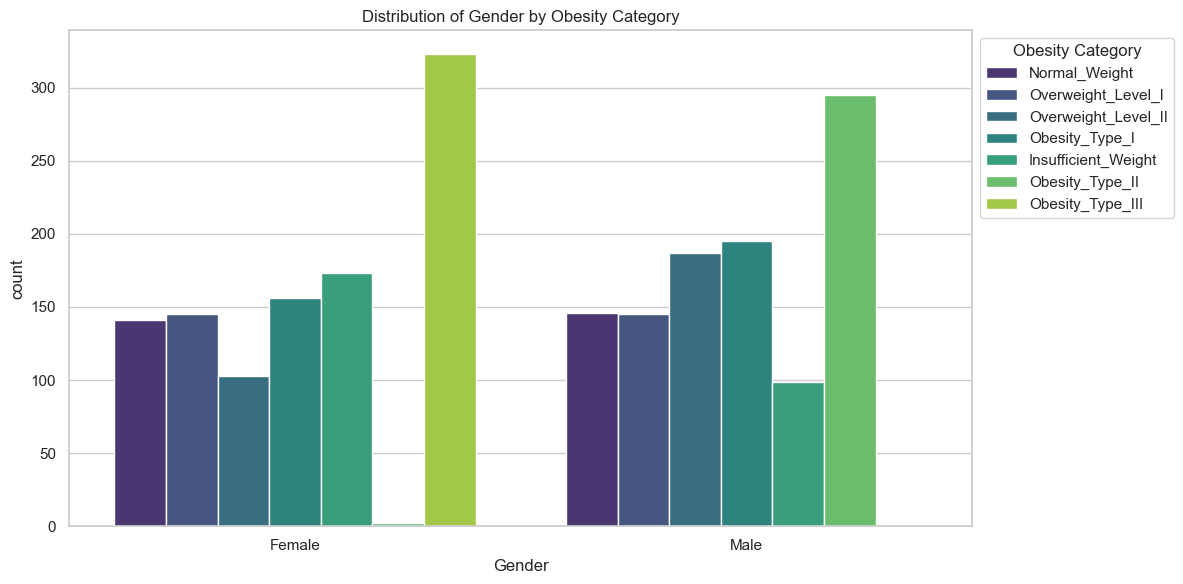

In [26]:
# Lets vizualize gender distribution with obesity categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Gender', hue='NObeyesdad', palette='viridis')
plt.title('Distribution of Gender by Obesity Category')
plt.legend(title='Obesity Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### ☝️ almost all obesity type 3 subjects are female and almost all obesity type 2 are male

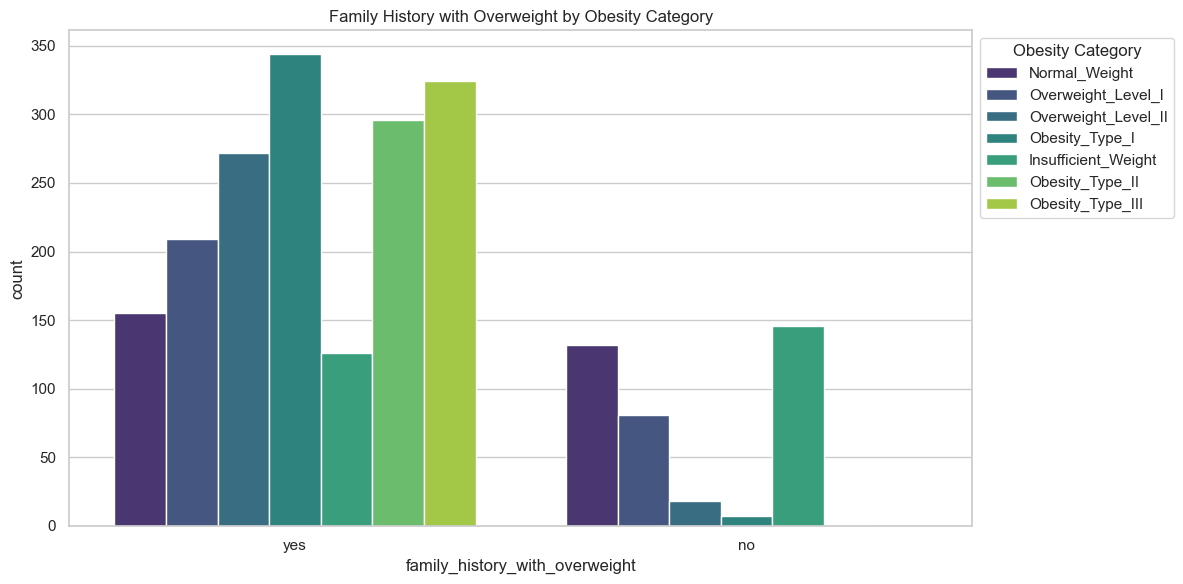

In [27]:
# Lets analyze family history with overweight with obesity categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='family_history_with_overweight', hue='NObeyesdad', palette='viridis')
plt.title('Family History with Overweight by Obesity Category')
plt.legend(title='Obesity Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### ☝️ Interestingly most people who are obese and overweight tend to have a family history with obesity

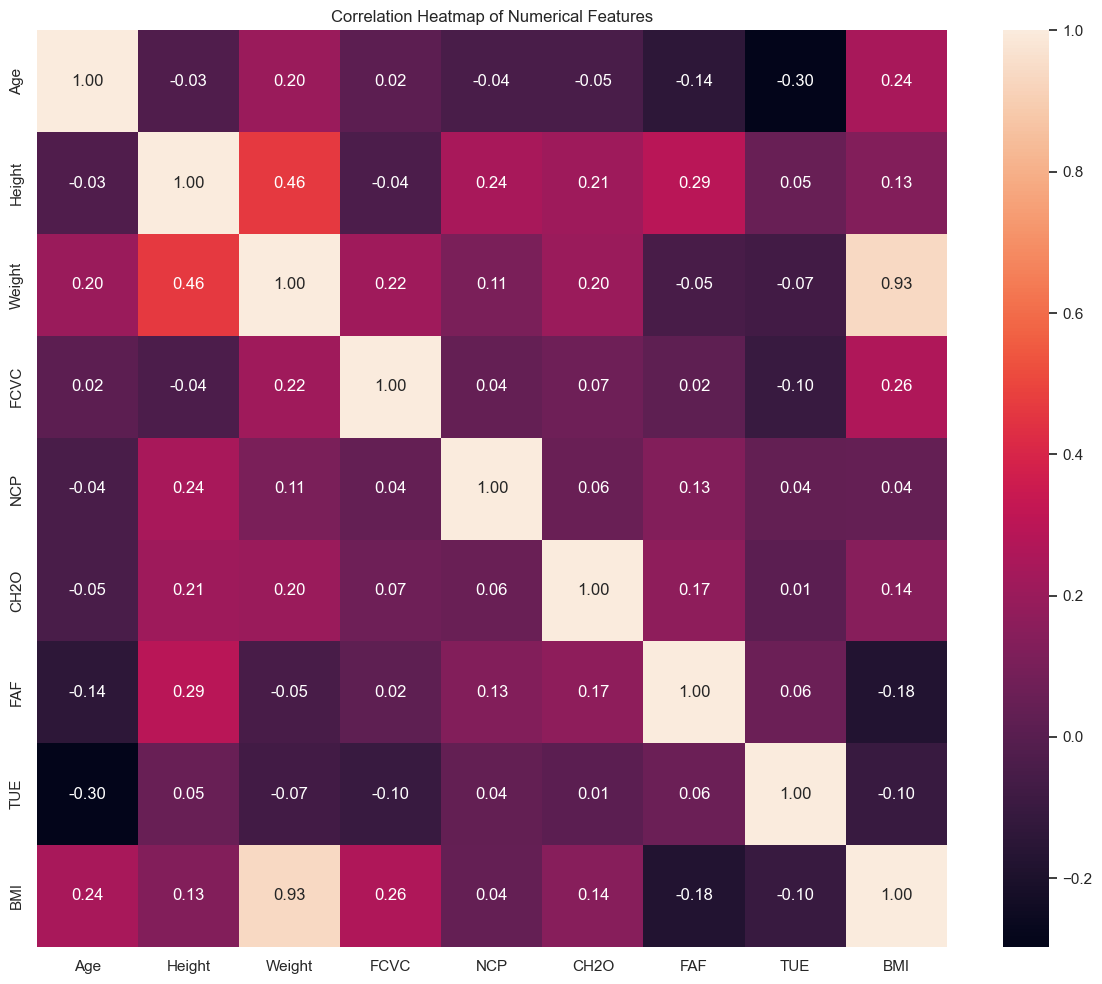

In [31]:
# Correlation heatmap for numerical variables
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

### ☝️ Observations
1. Weight is highly correlated with BMI, which is expected since BMI is calculated using weight and height.
2. lets keep height and weight and remove bmi in order to avoid information leakage as Obesity categories are directly determined by BMI

### 3. Organise the data for modelling

In [74]:
# Define features and target variable
X = df.drop(['NObeyesdad', 'BMI'], axis=1)
y = df['NObeyesdad']

In [75]:
# Identify categorical and numerical features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [76]:
# Lets apply standard scaler to numerical features and one hot encoder to categorical features
# Standard scaler is used to standardize features by removing the mean and scaling to unit variance
# Standardization helps in improving the performance of many machine learning algorithms
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Since we dont have too many categorical features, we can use one hot encoder to convert categorical variables into dummy/indicator variables
# We ignore by encoding unknown variables encountered during testing as all 0
categorical_transformer = Pipeline(steps=[
    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [42]:
# Combine preprocessing steps
# We create a preprocessor that applies the transformations to the respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical-features', numerical_transformer, numerical_features),
        ('categorical-feautures', categorical_transformer, categorical_features)
    ])

In [ ]:
# Let's split data into training and testing sets with a split ratio of 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1688, 16)
Testing set shape: (423, 16)


### 4. Implement prediction models

#### Lets select 4 models to train and evaluate
1. Logistic Regression - Baseline model - mainly used for interpretability
2. Random Forest Classifier - Bagging Classifer
3. Gradient Boosting Classifier - Boosting Classifier
4. SVM Classifier - Kernel Based Classifier

##### Then we create pipeline for each model

In [45]:
# Create multiple classifier pipelines
# 1. Random Forest classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 2. Gradient Boosting classifier
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# 3. SVM classifier
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# 4. Logistic Regression classifier (Baseline model)
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1260))
])

### 5. Train prediction models

In [ ]:
# Train Random Forest with cross-validation
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest cross-validation scores:", rf_scores)
print("Random Forest mean CV accuracy:", rf_scores.mean())

# Train Gradient Boosting with cross-validation
gb_scores = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Gradient Boosting cross-validation scores:", gb_scores)
print("Gradient Boosting mean CV accuracy:", gb_scores.mean())

# Train SVM with cross-validation
svm_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("SVM cross-validation scores:", svm_scores)
print("SVM mean CV accuracy:", svm_scores.mean())

# Train Logistic Regression with cross-validation
lr_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression cross-validation scores:", lr_scores)
print("Logistic Regression mean CV accuracy:", lr_scores.mean())


Random Forest cross-validation scores: [0.9408284  0.91715976 0.94674556 0.91988131 0.95252226]
Random Forest mean CV accuracy: 0.9354274577283024

Gradient Boosting cross-validation scores: [0.96153846 0.94378698 0.96153846 0.96735905 0.95845697]
Gradient Boosting mean CV accuracy: 0.9585359858128631

SVM cross-validation scores: [0.9112426  0.9112426  0.91420118 0.87833828 0.93175074]
SVM mean CV accuracy: 0.9093550822608115

Logistic Regression cross-validation scores: [0.89053254 0.86982249 0.85502959 0.85756677 0.86646884]
Logistic Regression mean CV accuracy: 0.8678840447386442


### ☝️ The best 2 models are random forest classifier and gradient boosting classifier

In [ ]:

# Random Forest parameter grid
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("\nTraining Random Forest with GridSearchCV...")
rf_grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation score for Random Forest:", rf_grid_search.best_score_)

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_


Training Random Forest with GridSearchCV...
Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation score for Random Forest: 0.9413533966604042


In [ ]:
# Gradient Boosting parameter grid
gb_param_grid = {
    'classifier__n_estimators': [100, 400],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5]
}

gb_grid_search = GridSearchCV(
    gb_pipeline,
    gb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Training Gradient Boosting with GridSearchCV...")
gb_grid_search.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best cross-validation score for Gradient Boosting:", gb_grid_search.best_score_)

# Get the best Gradient Boosting model
best_gb_model = gb_grid_search.best_estimator_


Training Gradient Boosting with GridSearchCV...
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best cross-validation score for Gradient Boosting: 0.9638719646023913


### ☝️ Boosting classifier seem to do more well than Bagging classifier, now lets check its performance on test set

### 6. Test prediction models and show results

In [64]:
# Let's evaluate the best Random Forest model
rf_y_pred = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Test Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Let's evaluate the best Gradient Boosting model
gb_y_pred = best_gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Test Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_y_pred))

# Let's evaluate SVM model
svm_pipeline.fit(X_train, y_train)
svm_y_pred = svm_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Test Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

# Let's evaluate Logistic Regression model
lr_pipeline.fit(X_train, y_train)
lr_y_pred = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Test Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))

Random Forest Test Accuracy: 0.9408983451536643
Random Forest Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.83      0.92      0.87        62
     Obesity_Type_I       0.99      0.92      0.95        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.86      0.88        56
Overweight_Level_II       0.94      0.94      0.94        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423

Gradient Boosting Test Accuracy: 0.950354609929078
Gradient Boosting Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94        56
      Normal_Weight       

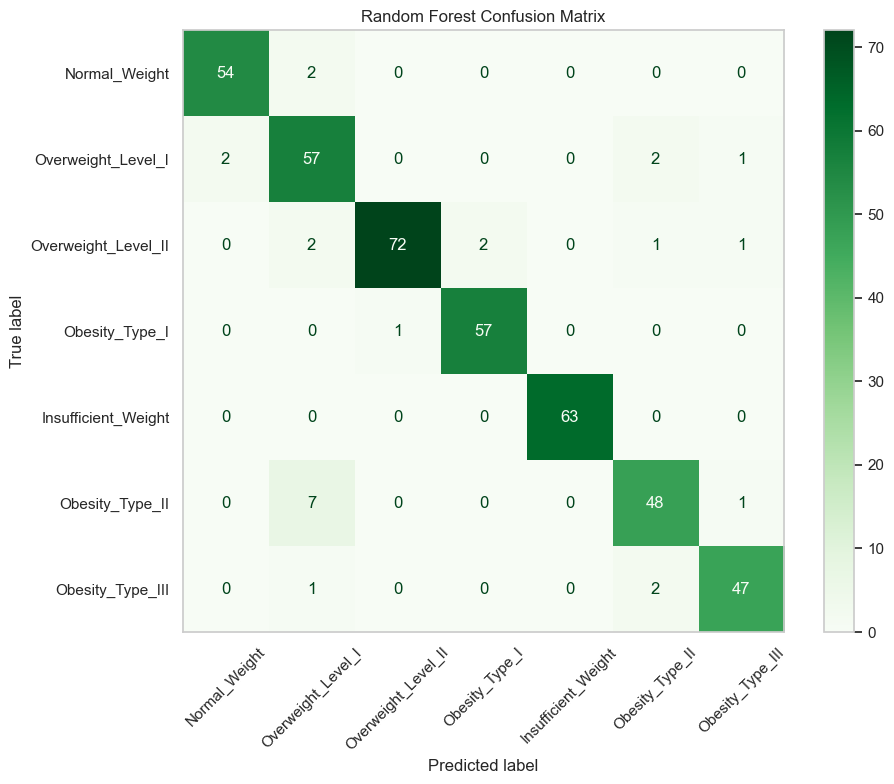

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

rf_cm = confusion_matrix(y_test, rf_y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                              display_labels=y.unique())
disp.plot(cmap='Greens', ax=ax, include_values=True, xticks_rotation=45, values_format='d', colorbar=True)
ax.grid(False)

plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

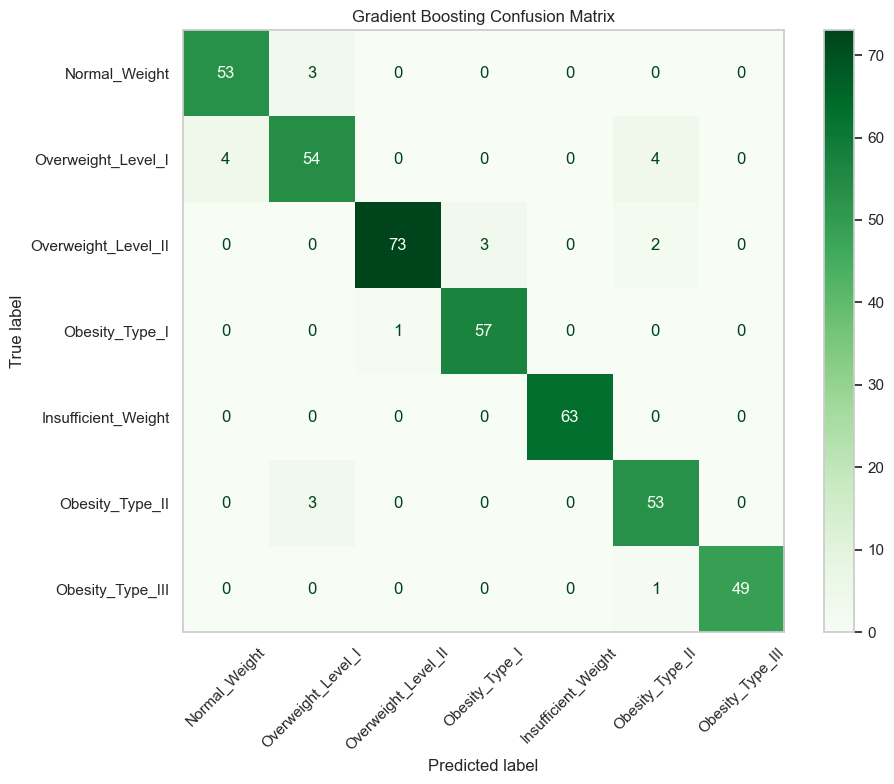

In [62]:
gb_cm = confusion_matrix(y_test, gb_y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=gb_cm, 
                              display_labels=y.unique())
disp.plot(cmap='Greens', ax=ax, include_values=True, xticks_rotation=45, values_format='d', colorbar=True)

ax.grid(False)

plt.title('Gradient Boosting Confusion Matrix')
plt.tight_layout()
plt.show()

### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [65]:
# Compare all models based on test accuracy
print("Random Forest accuracy:", rf_accuracy)
print("Gradient Boosting accuracy:", gb_accuracy)
print("SVM accuracy:", svm_scores.mean())
print("Logistic Regression accuracy:", lr_accuracy)

Random Forest accuracy: 0.9408983451536643
Gradient Boosting accuracy: 0.950354609929078
SVM accuracy: 0.9093550822608115
Logistic Regression accuracy: 0.8699763593380615


### ☝️ of all the models Gradient Boosting has the highest accuracy of 0.95 on test data, hence finalizing it

In [78]:
### Feature Importance Analysis

# Gradient Boosting feature importance
gb_importance = best_gb_model.named_steps['classifier'].feature_importances_
gb_feature_names = numerical_features + list(best_gb_model.named_steps['preprocessor'].transformers_[1][1].named_steps['one-hot-encoder'].get_feature_names_out(categorical_features))
gb_feature_importance = pd.DataFrame({'Feature': gb_feature_names, 'Importance': gb_importance})
gb_feature_importance = gb_feature_importance.sort_values('Importance', ascending=False)

# Lets print top 10 features
print("Top 10 features for Gradient Boosting:")
print(gb_feature_importance.head(10))

Top 10 features for Gradient Boosting:
          Feature  Importance
2          Weight    0.547156
1          Height    0.160054
3            FCVC    0.082542
0             Age    0.040679
9     Gender_Male    0.039130
8   Gender_Female    0.032348
25        CALC_no    0.024163
4             NCP    0.014180
5            CH2O    0.012124
6             FAF    0.011256


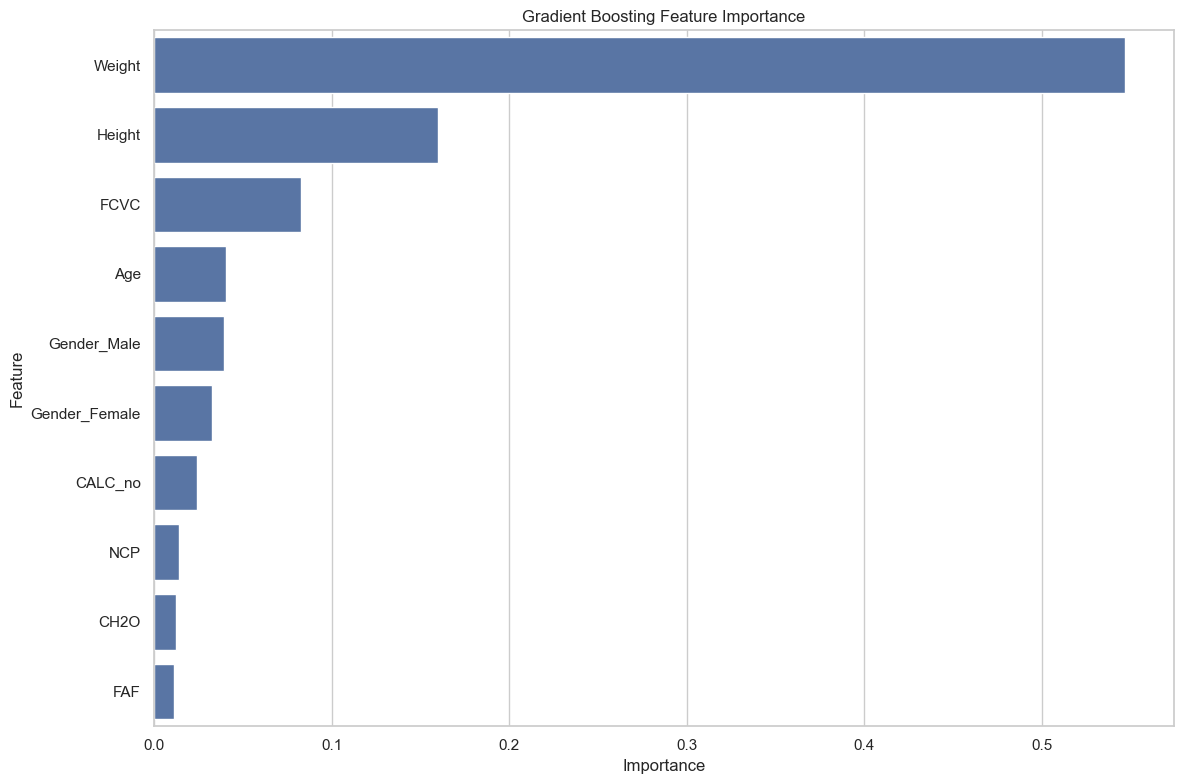

In [ ]:
# Lets visualize feature importance for Gradient Boosting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance[:10])
plt.title('Gradient Boosting Feature Importance')
plt.tight_layout()
plt.show()

### ☝️ We can see the features with highest importance are
1. Obviously weight and height are the most important featues as obesity is directly linked to BMI
2. Height and weight together contribute to over 70% of model predictability
3. Apart from these 2 features frequency of consumption vegetable, age and gender contribute to prediction strength
4. Minor contribution to prediction strength from Consumption of alcohol, no of meals, consumption of water and physical activity frequency.

### 8. Describe appropriate recommendations

In [99]:
print('''
1. Public policy to make sure people eat nutritious foood and workout so that they maintain healthy weight according to BMI range
* Evidence - Strong indication based on feature importance that weight is the biggest contributor to obesity
* Recommendation - If people are underweight they need to put on weight, if they are overweight they need to cut down weight by eating healthy food and working out

2. Public policy to make sure people increase their consumption of vegetable
* Evidence - Feature importance shows consumption of vegetable as one of the indicators of obesity
* Recommedation - Although consumption of vegetable as an individual feature does not show clear relation with obesity but probably it affects obesity when considered along with other features,
* Based on my knowledge, eating vegetables leads to healthy lifestyle which helps reduce obesity

3. Age related nutrition
* Evidence - Feature importance shows Age as one of the indicators of obesity
* Recommendation - Age based nutrition program to maitain obesity

4. Gender related policies
* Evidence - Feature importance shows Gender as one of the indicators of obesity
* Recommendation - Gender sensitive programs to reduce obesity

5. Regulate consumption of alcohol
* Evidence - Feature importance shows consumption of alcohol as one of the indicators of obesity
* Recommendation - People need to be educated about calorific content of alcoholic beverages 
''')


1. Public policy to make sure people eat nutritious foood and workout so that they maintain healthy weight according to BMI range
* Evidence - Strong indication based on feature importance that weight is the biggest contributor to obesity
* Recommendation - If people are underweight they need to put on weight, if they are overweight they need to cut down weight by eating healthy food and working out

2. Public policy to make sure people increase their consumption of vegetable
* Evidence - Feature importance shows consumption of vegetable as one of the indicators of obesity
* Recommedation - Although consumption of vegetable as an individual feature does not show clear relation with obesity but probably it affects obesity when considered along with other features,
* Based on my knowledge, eating vegetables leads to healthy lifestyle which helps reduce obesity

3. Age related nutrition
* Evidence - Feature importance shows Age as one of the indicators of obesity
* Recommendation - Age b

### 9. Reflect on what you have learned by completing this assignment

In [101]:
print('''
By completing this assignment I learned about
1. All the libraries involved in data analysis and visualization
2. How to visualize data using seaborn and matplotlib
3. How to preprocess data using sklearn
4. How to build machine learning models using sklearn
5. How to evaluate machine learning models using sklearn
6. How to tune hyperparameters using GridSearchCV
7. How to visualize feature importance using sklearn
8. How to interpret the results of machine learning models
9. How to translate the results of machine learning models into real world recommendations
10. Overcoming preconcieved bias and prejudices with data driven evidence - Initially I thought means of transportation would be the biggest contributor to obesity but it turned out to be weight and age
''')


By completing this assignment I learned about
1. All the libraries involved in data analysis and visualization
2. How to visualize data using seaborn and matplotlib
3. How to preprocess data using sklearn
4. How to build machine learning models using sklearn
5. How to evaluate machine learning models using sklearn
6. How to tune hyperparameters using GridSearchCV
7. How to visualize feature importance using sklearn
8. How to interpret the results of machine learning models
9. How to translate the results of machine learning models into real world recommendations
10. Overcoming preconcieved bias and prejudices with data driven evidence - Initially I thought means of transportation would be the biggest contributor to obesity but it turned out to be weight and age



### 10. References

In [102]:
print("""
1. Hao, J & Ho, TK 2019, 'Machine learning made easy: a review of scikit-learn package in python programming language', Journal of Educational and Behavioral Statistics, vol. 44, no. 3, pp. 348-361.

2. Nuttall, FQ 2015, 'Body mass index: obesity, BMI, and health: a critical review', Nutrition Today, vol. 50, no. 3, pp. 117-128.

3. Charoen-Ung, P & Mittrapiyanuruk, P 2018, 'Sugarcane yield grade prediction using random forest and gradient boosting tree techniques', in Proceedings of the 15th International Joint Conference on Computer Science and Software Engineering (JCSSE), IEEE, pp. 1-6.

4. Sahoo, K, Samal, AK, Pramanik, J & Pani, SK 2019, 'Exploratory data analysis using Python', International Journal of Innovative Technology and Exploring Engineering, vol. 8, no. 12, pp. 4727-4735.

5. Waskom, ML 2021, 'Seaborn: statistical data visualization', Journal of Open Source Software, vol. 6, no. 60, p. 3021.
""")



1. Hao, J & Ho, TK 2019, 'Machine learning made easy: a review of scikit-learn package in python programming language', Journal of Educational and Behavioral Statistics, vol. 44, no. 3, pp. 348-361.

2. Nuttall, FQ 2015, 'Body mass index: obesity, BMI, and health: a critical review', Nutrition Today, vol. 50, no. 3, pp. 117-128.

3. Charoen-Ung, P & Mittrapiyanuruk, P 2018, 'Sugarcane yield grade prediction using random forest and gradient boosting tree techniques', in Proceedings of the 15th International Joint Conference on Computer Science and Software Engineering (JCSSE), IEEE, pp. 1-6.

4. Sahoo, K, Samal, AK, Pramanik, J & Pani, SK 2019, 'Exploratory data analysis using Python', International Journal of Innovative Technology and Exploring Engineering, vol. 8, no. 12, pp. 4727-4735.

5. Waskom, ML 2021, 'Seaborn: statistical data visualization', Journal of Open Source Software, vol. 6, no. 60, p. 3021.

